# This flow of the notbook is :

## Step1: Data Exploration

## Step2: Models and Evaluation

## Step: Comparision

## Conclusion


# Step 1: Data Exploration

### Import libraries



In [3]:
import sklearn
import sklearn as sk
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import matplotlib.pyplot as plt
from sklearn import neighbors
from six import StringIO
import seaborn as sns
from IPython.display import display 
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import graphviz

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV

from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import fbeta_score
from sklearn.model_selection import cross_val_score



In [4]:
data = pd.read_csv('C:/Users/12035_/OneDrive/Desktop/UNH Studies/Fall 2020/01_ML/Final project/Autism-Screening-Child-Data Plus Description/archive/Data.csv')
display(data.head(n=5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [5]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [6]:
n_records = len(data.index)

n_asd_yes = len(data[data['Class/ASD'] == 'YES'])
n_asd_no = len(data[data['Class/ASD'] == 'NO'])
yes_percent = float(n_asd_yes) / n_records *100

print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))
print("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))

Total number of records: 704
Individuals diagonised with ASD: 189
Individuals not diagonised with ASD: 515
Percentage of individuals diagonised with ASD: 26.85%


----
### Preparing the Data

In [7]:
asd_data=data
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


---
<a id='step1'></a>
### Clean Datasets

In [8]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull()) 
|(asd_data['jundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD


Since the missing data seems randomly distributed, I go ahead and drop rows with missing data. 

In [9]:
asd_data.dropna(inplace=True)
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


#### If we could have fill with median values for 'NaN' instead of dropping them, but in this situation that is little complicated as I have lot of categorical colums with 'NaN'.

In [10]:
asd_data.median()
numerical = ['age', 'result']
asd_data.fillna(asd_data[numerical].median())
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


### Number of variables 

In [11]:
# Total number of records in clean dataset
n_records = len(asd_data.index)

# TODO: Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class/ASD'] == 'NO'])

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))

Total number of records: 704
Individuals diagonised with ASD: 189
Individuals not diagonised with ASD: 515


In [12]:

plt.hist(asd_classes, bins=10)
# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

NameError: name 'asd_classes' is not defined

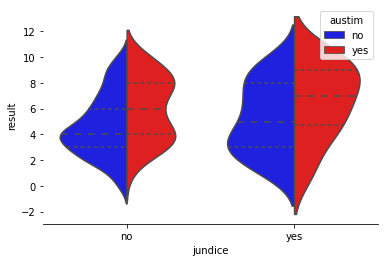

In [13]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

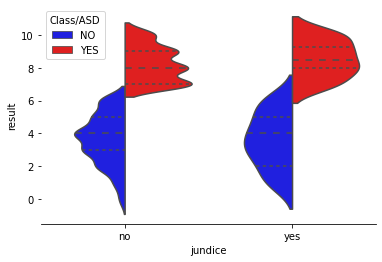

In [14]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

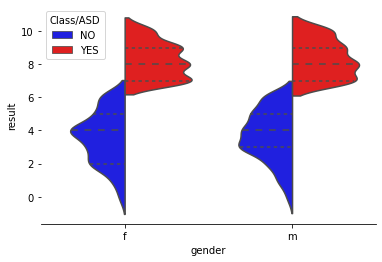

In [15]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

C:\Users\12035_\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\12035_\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


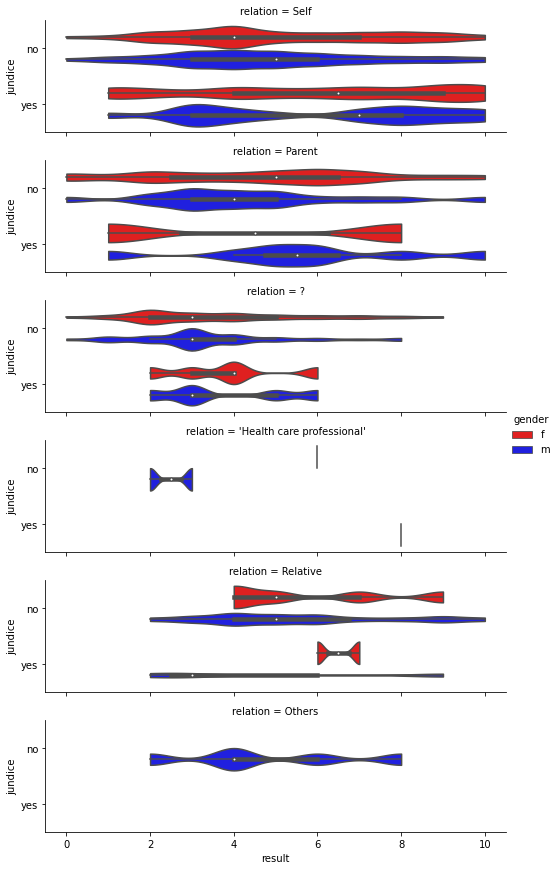

In [18]:
g = sns.factorplot(x="result", y="jundice",
                   hue="gender", row="relation",
                   data=asd_data,
                    orient="h", size=2, aspect=3.5, palette={'f': "r", 'm': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)

C:\Users\12035_\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\12035_\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\12035_\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


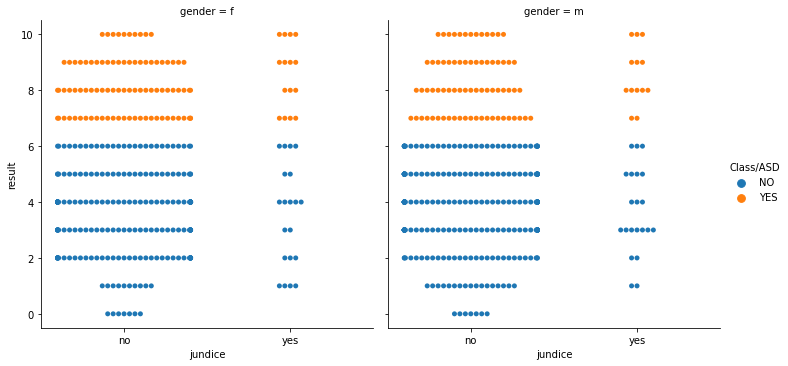

In [16]:
sns.factorplot(x="jundice", y="result", hue="Class/ASD", col="gender", data=asd_data, kind="swarm");

C:\Users\12035_\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\12035_\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


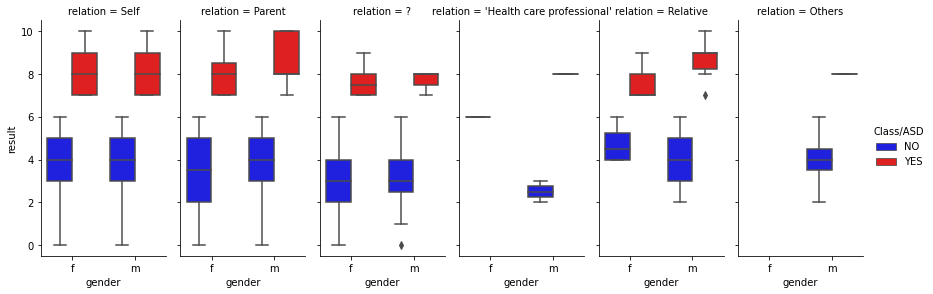

In [17]:
sns.factorplot(x="gender", y="result", hue="Class/ASD",
               col="relation", data=asd_data, kind="box", size=4, aspect=.5, palette={'YES': "r", 'NO': "b"});

### Split the data into features and target label


In [49]:
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

### checking the data types


In [50]:
y=asd_data['Class/ASD']
X=asd_data.drop(['Class/ASD'], axis=1)
X.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
dtype: object

In [51]:
for column in X.columns:
    if X[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        X[column] = le.fit_transform(X[column])

#### Normalization using MaxScaler().

In [52]:
scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = X)
features_minmax_transform[numerical] = scaler.fit_transform(X[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,1,0,0,1,1,0,0,0.195652,0,10,0,0,10,0,0.6,0,5
1,1,1,0,1,0,0,0,1,0,1,0.152174,1,6,0,1,25,0,0.5,0,5
2,1,1,0,1,1,0,1,1,1,1,0.217391,1,6,1,1,61,0,0.8,0,3
3,1,1,0,1,0,0,1,1,0,1,0.391304,0,10,0,1,10,0,0.6,0,5
4,1,0,0,0,0,0,0,1,0,0,0.521739,0,2,0,0,32,0,0.2,0,1


### One-Hot-Coding


In [53]:
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))
asd_classes = y.apply(lambda x: 1 if x == 'YES' else 0)

encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

print(encoded)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,1,0,0,1,1,0,0,0.195652,0,10,0,0,10,0,0.6,0,5
1,1,1,0,1,0,0,0,1,0,1,0.152174,1,6,0,1,25,0,0.5,0,5
2,1,1,0,1,1,0,1,1,1,1,0.217391,1,6,1,1,61,0,0.8,0,3
3,1,1,0,1,0,0,1,1,0,1,0.391304,0,10,0,1,10,0,0.6,0,5
4,1,0,0,0,0,0,0,1,0,0,0.521739,0,2,0,0,32,0,0.2,0,1


20 total features after one-hot encoding.
['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation']


### Shuffle and Split Data


In [54]:

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
#asd_data

Training set has 563 samples.
Testing set has 141 samples.


---


# Step 2: Models and evaluating methods

###  Supervised Learning Models


####  Decision Trees

#### Random Forest

#### K-Nearest Neighbors (KNeighbors)

#### Gaussian Naive Bayes (GaussianNB)




---
<a id='1'></a>

##  (1) Decision Trees



In [74]:
dctree = DecisionTreeClassifier(random_state=0, max_depth=14)
dctree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=14, random_state=0)

In [75]:
# make class predictions for the testing set
y_pred_class1 = dctree.predict(X_test)

In [76]:
print(metrics.accuracy_score(y_test, y_pred_class1))

1.0


---------------
## Evaluating Model Performance



In [77]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class1[0:25])

True: [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0]
False: [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0]


#### Confusion matrix

In [78]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class1)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

#sensitivity
sensitivity = TP / float(FN + TP)
print("sensitivity")
print(sensitivity)

#specificity
print("specificity")
specificity = TN / (TN + FP)

print(specificity)

#precision
precision = TP / float(TP + FP)

print("precision:")
print(metrics.precision_score(y_test, y_pred_class1))

[[105   0]
 [  0  36]]
sensitivity
1.0
specificity
1.0
precision:
1.0


### Metrics computed from a confusion matrix

**Classification Accuracy**: Overall, how often is the classifier correct?

In [79]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))

1.0


**Classification Error**: Overall, how often is the classifier incorrect?

In [80]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.0


**Sensitivity**: When the actual value is positive, how often is the prediction correct?


In [81]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class1))

1.0
1.0


**Specificity**: When the actual value is negative, how often is the prediction correct?

In [82]:
specificity = TN / (TN + FP)

print(specificity)

1.0


**False Positive Rate**: When the actual value is negative, how often is the prediction incorrect?

In [83]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
#print(1 - specificity)

0.0


**Precision**: When a positive value is predicted, how often is the prediction correct?

In [84]:
precision = TP / float(TP + FP)

#print(precision)
print(metrics.precision_score(y_test, y_pred_class1))

1.0


### F-beta Score:

In [85]:
dctree.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test1 = dctree.predict(X_test)
fbeta_score(y_test, y_pred_class1, average='binary', beta=0.5)

1.0

---
<a id='2'></a>
## (2) Random Forest

Now I apply a **RandomForestClassifier** instead to see whether it performs better.

In [86]:
model_params = {
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

In [87]:
RF = RandomForestClassifier(max_depth= 3)
RF.fit(X_train, y_train)
#clf=dctree
clf = GridSearchCV(RF, model_params, cv=5)
clf.fit(X_train, y_train)

from pprint import pprint
pprint(clf.best_estimator_.get_params())
y_pred_class2=clf.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class2))


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
1.0


AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [69]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(RF, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

F-beta Score:

In [89]:
RF.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test2 = RF.predict(X_test)
fbeta_score(y_test, y_pred_class2, average='binary', beta=0.5)

1.0

---
<a id='4'></a>

## (3) K-Nearest-Neighbors (KNN)


In [90]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

In [91]:
knn.fit(X_train, y_train)
y_pred_class3=knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class3))

0.9078014184397163


In [92]:

mean1=metrics.mean_absolute_error(y_test, y_pred_class3)
mean1

0.09219858156028368

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [93]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(knn, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9413385462147073

In [94]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class3)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

#sensitivity
sensitivity = TP / float(FN + TP)
print("sensitivity")
print(sensitivity)

#specificity
print("specificity")
specificity = TN / (TN + FP)

print(specificity)

#precision
precision = TP / float(TP + FP)

print("precision:")
print(metrics.precision_score(y_test, y_pred_class3))

[[96  9]
 [ 4 32]]
sensitivity
0.8888888888888888
specificity
0.9142857142857143
precision:
0.7804878048780488


F-beta Score:

In [95]:
knn.fit(X_train, y_train)

predictions_test3 = knn.predict(X_test)
fbeta_score(y_test, predictions_test3, average='binary', beta=0.5)

0.8

In [96]:
for n in range(3, 10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)
    print (n, cv_scores.mean())

3 0.8905633802816902
4 0.8905835010060363
5 0.8763581488933602
6 0.8707243460764588
7 0.8593762575452717
8 0.8608450704225351
9 0.8651710261569416


No Skill: ROC AUC=0.902


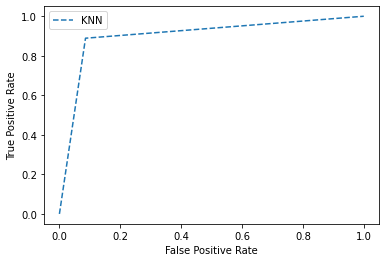

In [100]:

ns_auc = roc_auc_score(y_test, y_pred_class3)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_pred_class3)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='KNN')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

---
<a id='5'></a>

## (4) Naive Bayes

Now I try naive_bayes.MultinomialNB classifier and ask how does its accuracy stack up.

In [101]:


#scaler = preprocessing.MinMaxScaler()
#all_features_minmax = scaler.fit_transform(all_features)

nb = MultinomialNB()
cv_scores = cross_val_score(nb, features_final, asd_classes, cv=10)

cv_scores.mean()

0.6864587525150906

In [102]:
#accuracy_score
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_class4=nb.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class4))

0.574468085106383


AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [103]:
# calculate cross-validated AUC

cross_val_score(nb, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.7981357995289884

In [104]:

confusion = metrics.confusion_matrix(y_test, y_pred_class4)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

#sensitivity
sensitivity = TP / float(FN + TP)
print("sensitivity")
print(sensitivity)

#specificity
print("specificity")
specificity = TN / (TN + FP)

print(specificity)

#precision
precision = TP / float(TP + FP)

print("precision:")
print(metrics.precision_score(y_test, y_pred_class4))

[[59 46]
 [14 22]]
sensitivity
0.6111111111111112
specificity
0.5619047619047619
precision:
0.3235294117647059


F-beta Score:

In [105]:
#from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred_class4, average='binary', beta=0.5)

0.3571428571428571

No Skill: ROC AUC=0.587


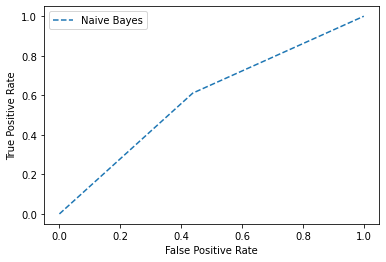

In [106]:

ns_auc = roc_auc_score(y_test, y_pred_class4)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_pred_class4)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Naive Bayes')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Step3: Comparision

DT: ROC AUC=1.000
RF: ROC AUC=1.000
KNN: ROC AUC=0.902
NB: ROC AUC=0.587


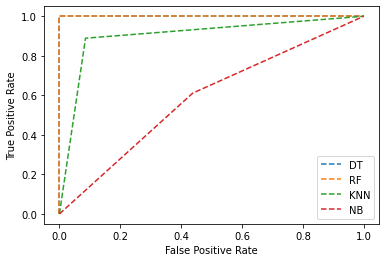

In [107]:

auc1 = roc_auc_score(y_test, y_pred_class1)
auc2 = roc_auc_score(y_test, y_pred_class2)
auc3 = roc_auc_score(y_test, y_pred_class3)
auc4 = roc_auc_score(y_test, y_pred_class4)

# summarize scores
print('DT: ROC AUC=%.3f' % (auc1))
print('RF: ROC AUC=%.3f' % (auc2))
print('KNN: ROC AUC=%.3f' % (auc3))
print('NB: ROC AUC=%.3f' % (auc4))

# calculate roc curves
fpr1, tpr1, _ = roc_curve(y_test, y_pred_class1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_class2)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_class3)
fpr4, tpr4, _ = roc_curve(y_test, y_pred_class4)

# plot the roc curve for the model
plt.plot(fpr1, tpr1, linestyle='--', label='DT')
plt.plot(fpr2, tpr2, linestyle='--', label='RF')
plt.plot(fpr3, tpr3, linestyle='--', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--', label='NB')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Conclusion

After exploring ASD dataset with different kind of learning algorithms, I can come to a conclusion that all of my model work extremely well with the data. I have used different metric such as accuracy, AUC score and F-score to measure the performance of my models. It looks like all of the metric indicated an almost perfect classification of the ASD cases.

As the dataset was meant for academic purpose and the features in the dataset that have proved to be effective in detecting the ASD, the results obtained by running the machine learning model turned out to give very good accuracy specially for Decision tree and Random Forest. The table below shows the Metrics results for all four machine learning models. Random forest won over all the four models. 

An important task when performing supervised learning on a dataset like the autistic data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual has ASD or not. Choose a scikit-learn classifier like random forests that has a feature_importance_ attribute, which is a function that ranks the importance of features according to the chosen classifier hence the accuracy is more in RF and DT. 